### Justice Nii-Ayitey

### STAT517 Preliminary Final Project

### Topic: Vehicle Fuel Economy 

### Supervised Learning-Classification

### Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd
#data visual
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import Imputer
from missingpy import KNNImputer

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Load Data

In [7]:
veh = pd.read_csv("https://raw.githubusercontent.com/justicejanak/Stat-517/master/vehicles.csv")
veh.head(3)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
veh.shape

(39588, 83)

In [6]:
#veh.columns

### Visual Inspection of Data

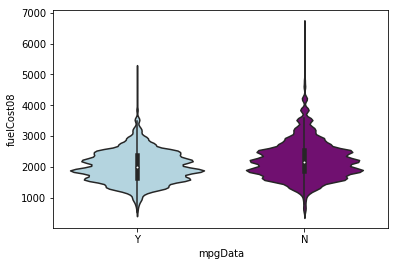

In [8]:
sns.violinplot("mpgData", "fuelCost08", data=veh,
              palette=["lightblue", "purple"]);

From the plot above,truely vehichles that responded yes to mpgData have less annual fuel cost for fuelType1 (i.e.fuelCost08 ) 

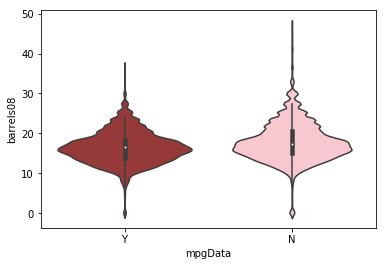

In [9]:
sns.violinplot("mpgData", "barrels08", data=veh,
              palette=["brown", "pink"]);

Also from the plot above,truely vehichles that responded yes to mpgData have less annual petroleum consumption in barrels for fuelType1 (i.e.barrels08 )  

### Preprocessing the Dataset

In [10]:
#changing predictor variable mpgData 
#from "object" type to "category" type.
veh["mpgData"] = veh["mpgData"].astype('category')
veh["mpgData_cat"] = veh["mpgData"].cat.codes

In [12]:
veh = veh.select_dtypes(include=['uint','int8','int64','float64']).copy()
veh.head(3)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb,mpgData_cat
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,35.0,0.0,1985,-2250,0.0,0,0,0,1
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,19.0,0.0,1985,-10500,0.0,0,0,0,0
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,0.0,47.0,0.0,1985,0,0.0,0,0,0,1


### Train and Test Datasets

In [13]:
#mpgData_cat as the response variables
y_veh=veh['mpgData_cat']
y_veh.shape

(39588,)

In [14]:
#all variables except mpgData_cat
X_veh=veh.drop('mpgData_cat',axis=1)
X_veh.shape

(39588, 59)

In [15]:
X_veh.isna().sum().sum() #determines total number of missing values

330

In [16]:
#Uses KNN as imputation method
imputer = KNNImputer(n_neighbors=1)
X_imputed = imputer.fit_transform(X_veh)
X_imputed = pd.DataFrame(X_imputed) #transforms X_imputed from array to pandas dataframe
X_imputed.columns = X_veh.columns  #sets column index appropriately

In [17]:
X_imputed.isna().sum().sum() 

0

In [18]:
X_veh = X_imputed #renames our imputed dataset
X_veh.head(3)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,...,23.3333,0.0,35.0,0.0,1985.0,-2250.0,0.0,0.0,0.0,0.0
1,29.964545,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,11.0000,0.0,19.0,0.0,1985.0,-10500.0,0.0,0.0,0.0,0.0
2,12.207778,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,...,29.0000,0.0,47.0,0.0,1985.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#dividing dataset into 75% being training and 25% being testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_veh, y_veh,
                                                random_state=1, test_size=0.25)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (29691, 59)
X_test shape: (9897, 59)
y_train shape: (29691,)
y_test shape: (9897,)


### k-Nearest Neighbor


In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [23]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [24]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [0 0 0 ... 1 0 1]


In [25]:
print("Train set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))


Train set accuracy: 0.74
Test set accuracy: 0.74


In [26]:
#roc curve
y_model = clf.predict(X_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_model)
roc_auc_score(y_test,y_model)

0.689529440748953

### Analyzing KNeighborsClassifier

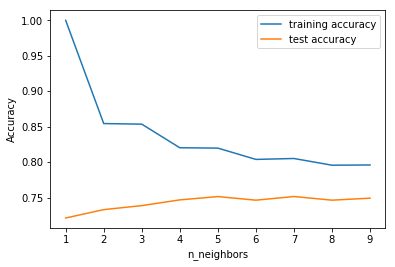

In [27]:
#with a range from 1 to 10, the test accuracy is high when n_neighbors is at 7
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Naive Bayes


In [28]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data

In [31]:
from sklearn.metrics import accuracy_score
print("Training set score: {:.3f}".format(model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model.score(X_test, y_test)))

Training set score: 0.531
Test set score: 0.522


In [32]:
#roc curve 
roc_auc_score(y_test,y_model)

0.602677107492078

### Logistic Regression

In [34]:
#given c=1, c=100, and c=0.01, the training score, the test score and 
#roc curve for the logistic regression are below
logreg = LogisticRegression().fit(X_train, y_train)
y_model = logreg.predict(X_test)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.724
Test set score: 0.723


In [35]:
#roc curve
roc_auc_score(y_test,y_model)

0.6224950655985139

In [36]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
y_model = logreg100.predict(X_test)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.723
Test set score: 0.722


In [37]:
#roc curve
roc_auc_score(y_test,y_model)

0.6177856501658014

In [38]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
y_model = logreg001.predict(X_test)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.724
Test set score: 0.722


In [39]:
#roc curve
roc_auc_score(y_test,y_model)

0.6187168857059522

### Decision Trees

In [40]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_model = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.733


In [41]:
#roc curve
roc_auc_score(y_test,y_model)

0.6929852208657928

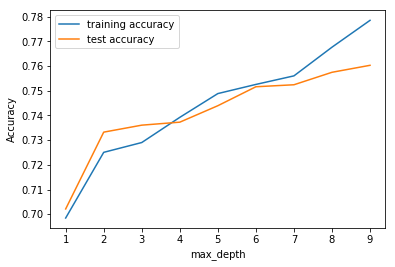

In [43]:
#for a given range from 1 to 10, the test accuracy of the 
#Decision Tree is high when max_depth is at 6
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 10
max_depth_settings = range(1, 10)

for max_depth in max_depth_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_model = forest.predict(X_test)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.773


In [45]:
#roc curve
roc_auc_score(y_test,y_model)

0.726380499698414

### Neural Networks

In [46]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_model = mlp.predict(X_test)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.68
Accuracy on test set: 0.68


In [47]:
#roc curve
roc_auc_score(y_test,y_model)

0.688871685738801

### Support Vector Machine

In [46]:
#the output of SVC takes sometime

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_model = logreg001.predict(X_test)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.95
Accuracy on test set: 0.71


In [47]:
roc_curve
y_model = model.predict(X_test)
roc_auc_score(y_test,y_model)

0.602677107492078

### Summary

In [48]:
decision=pd.DataFrame({'Model':['k-Nearest Neighbor','Naive Bayes','logreg',
                                'logreg100','logreg0.01','Decision Tree',
                                'Random Forest', 'Neural Networks','SVC'],
                       'Training Score':[0.74,0.531,0.724,0.723,0.724,1,1,0.68,0.95],
                           'Test Score':[0.74,0.522,0.723,0.722,0.722,0.733,0.773,0.68,0.71],
                       'ROC':[0.69,0.603,0.622,0.618,0.619,0.693,0.726,0.689,0.603]})
decision

,Model,ROC,Test Score,Training Score
0,k-Nearest Neighbor,0.690,0.740,0.740
1,Naive Bayes,0.603,0.522,0.531
2,logreg,0.622,0.723,0.724
3,logreg100,0.618,0.722,0.723
4,logreg0.01,0.619,0.722,0.724
5,Decision Tree,0.693,0.733,1.000
6,Random Forest,0.726,0.773,1.000
7,Neural Networks,0.689,0.680,0.680
8,SVC,0.603,0.710,0.950


mpgData (vehichles that responded yes or no to mpgData) is categorical and it 
was considered as the reponse variable for the classification under supervised learning. 
From the table above, Random Forest was the highest in both ROC, Test Score and Training Score.
Hence it can be said as the best model for classifying mpgData respectivley. 